## UNDERSTANDING GRADIENT DESCENT WITH RESPECT TO B AND TAKING M AS VALUE THAT IS ALREADY KNOWN TO USER

In [113]:
from sklearn.datasets import make_regression
import numpy as np

In [114]:
x,y = make_regression(n_samples=4,n_features=1,n_informative=1,noise=80,random_state=13)

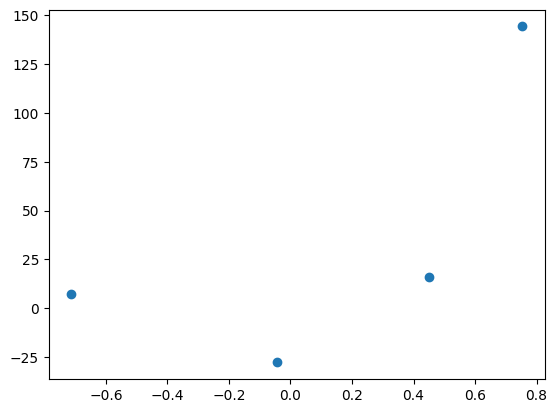

In [115]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [116]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [117]:
reg.coef_ # value of m

array([78.35063668])

In [118]:
reg.intercept_ # value of c

np.float64(26.15963284313262)

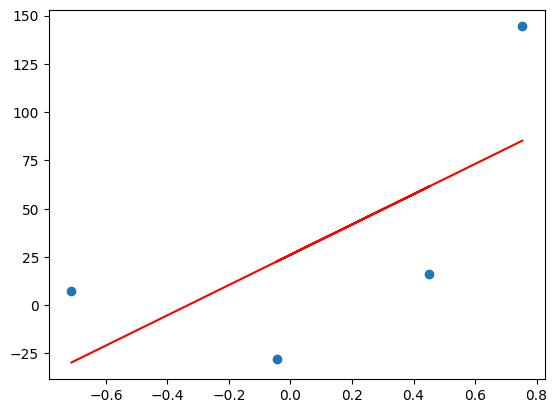

In [119]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red')

In [120]:
#Lets apply gradient descent assuming slope is constant m =78.35
# and lets assume the starting value of intercept b = 0
y_pred = ((78.36 * x) + 0).reshape(4)

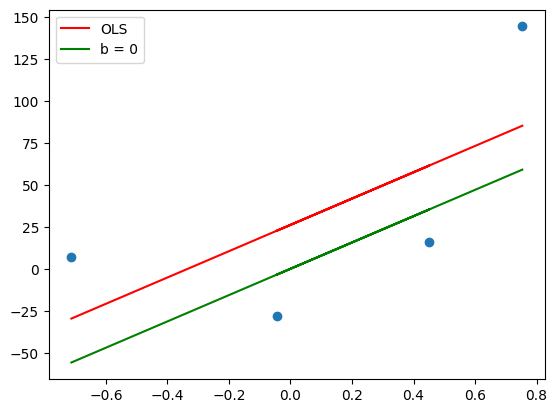

In [121]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label ='OLS')
plt.plot(x,y_pred,color='green',label ='b = 0')
plt.legend()
plt.show()

In [122]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - (m*x.ravel() - b))
loss_slope

np.float64(-209.27763408209216)

In [123]:
#Lets take learning rate as 0.1 
lr =0.1
step_size = loss_slope * lr
step_size

np.float64(-20.927763408209216)

In [124]:
#calculating new  intercept
b = b - step_size
b

np.float64(20.927763408209216)

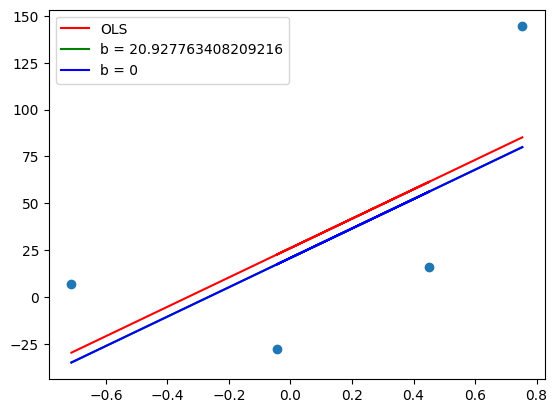

In [125]:
y_pred = ((78.36 * x) + b).reshape(4)

plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label ='OLS')
plt.plot(x,y_pred,color='green',label ='b = {}'.format(b))
plt.plot(x,y_pred,color='blue',label ='b = 0')
plt.legend()
plt.show()

In [126]:
b

np.float64(20.927763408209216)

In [134]:
#Iteration 2 where b - -20.92...

loss_slope = -2 * np.sum(y - (m*x.ravel() - b))
loss_slope

np.float64(-678.0595344259787)

In [128]:
step_size = loss_slope * lr
step_size

np.float64(-37.66997413477659)

In [129]:
b = b - step_size
b

np.float64(58.597737542985804)

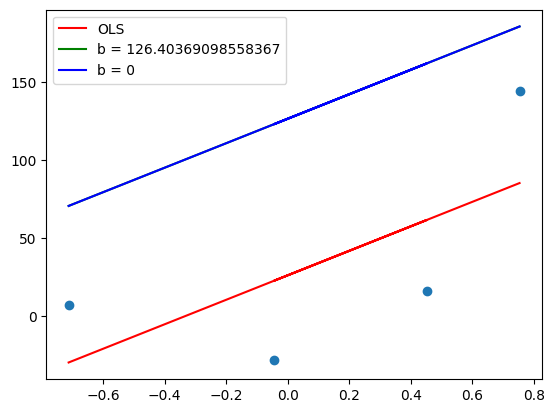

In [145]:
y_pred1 = ((78.36 * x) + b).reshape(4)
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label ='OLS')
plt.plot(x,y_pred1,color='green',label ='b = {}'.format(b))
plt.plot(x,y_pred,color='blue',label ='b = 0')
plt.legend()
plt.show()

In [136]:
b

np.float64(58.597737542985804)

In [137]:
#iteration 3 
loss_slope = -2 * np.sum(y - (m*x.ravel() - b))
loss_slope

np.float64(-678.0595344259787)

In [138]:
step_size = loss_slope * lr
step_size

np.float64(-67.80595344259787)

In [139]:
b = b - step_size
b

np.float64(126.40369098558367)

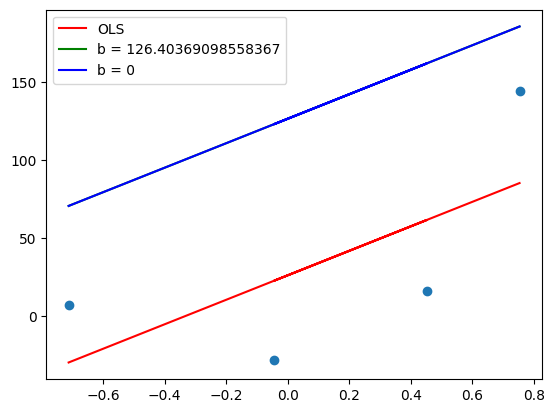

In [146]:
y_pred2 = ((78.36 * x) + b).reshape(4)
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label ='OLS')
plt.plot(x,y_pred2,color='green',label ='b = {}'.format(b))
plt.plot(x,y_pred,color='blue',label ='b = 0')
plt.legend()
plt.show()

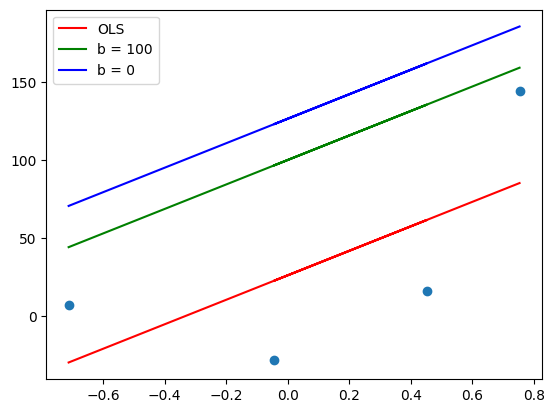

In [ ]:
y_pred3 = ((78.36 * x) + 100).reshape(4) #now if we start with b = 100
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label ='OLS')
plt.plot(x,y_pred3,color='green',label ='b = {}'.format(100))
plt.plot(x,y_pred,color='blue',label ='b = 0')
plt.legend()
plt.show()

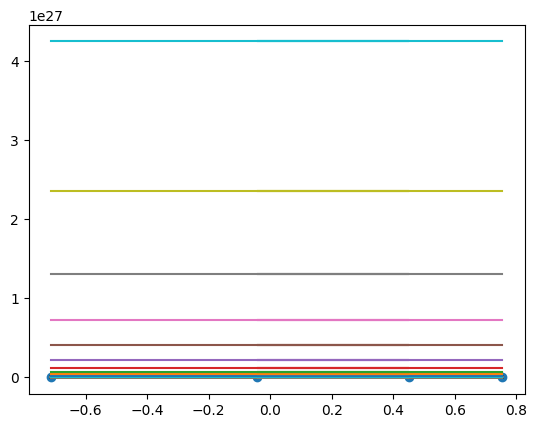

In [ ]:
#lets proceed with b =100 and see how many iterations it takes to converge
b= -100
m = 78.35
lr =0.1
epochs =100
for i in range(epochs):
    loss_slope = -2 * np.sum(y - (m*x.ravel() - b))
    step_size = loss_slope * lr
    b = b - step_size

    y_pred = ((78.36 * x) + b)

    plt.plot(x,y_pred)
plt.scatter(x,y)

## Creating our own CLASS

In [31]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score


In [32]:
X,Y = make_regression(n_samples=100,n_features=1,n_informative=1,noise=20,random_state=13)

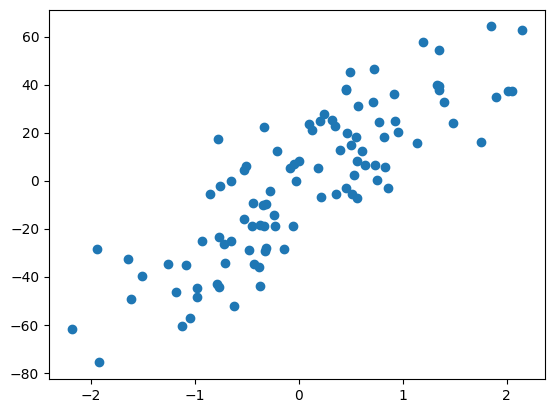

In [28]:
plt.scatter(X,Y)

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
np.mean(cross_val_score(lr,X,Y,cv=10,scoring='r2'))

np.float64(0.6375011587464419)

In [34]:
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [177]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self,X,Y):
        #calculate the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum((Y - self.m*X.ravel() - self.b))
            loss_slope_m = -2 * np.sum((Y - self.m*X.ravel() - self.b) * X.ravel())

            self.b = self.b - (loss_slope_b * self.lr)
            self.m = self.m - (loss_slope_m * self.lr)
        
        print(self.m,self.b)

In [179]:
gd =GDRegressor(0.001,50)

In [180]:
gd.fit(X,Y)

27.837060471820052 -2.2991839308293196
